In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split

In [2]:
#Get the data
classes = 10 
images = []
labels = [] 

for i in range(0, classes):
    imgList = os.listdir('Chars74k/Data/'+str(i))
    for j in imgList:
        currentImg = cv2.imread('Chars74k/Data/'+str(i)+'/'+str(j))
        currentImg = cv2.resize(currentImg, (28, 28))
        images.append(currentImg)
        labels.append(i)
        
print(len(images))
print(len(labels))

10160
10160


In [3]:
images = np.array(images)
labels = np.array(labels)
print(images.shape)
print(labels.shape)

(10160, 28, 28, 3)
(10160,)


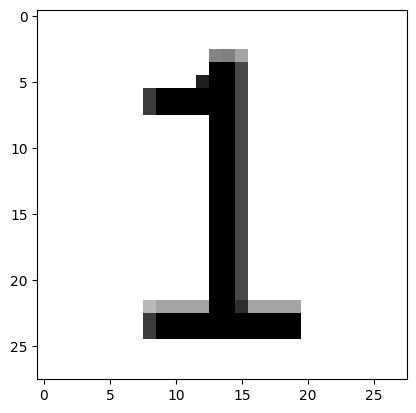

In [4]:
plt.imshow(images[2000])

In [5]:

train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2)
print(train_images.shape)
print(test_images.shape)

(8128, 28, 28, 3)
(2032, 28, 28, 3)


In [6]:

train_images,  val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2)
print(train_images.shape)
print(val_images.shape)

(6502, 28, 28, 3)
(1626, 28, 28, 3)


In [7]:
def preProcess(img):
    img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img=cv2.equalizeHist(img)
    x,img=cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
    img=img/255
    return img

train_images = np.array(list(map(preProcess, train_images)))
test_images = np.array(list(map(preProcess, test_images)))
val_images = np.array(list(map(preProcess, val_images)))

In [8]:
print(train_images.shape)
print(test_images.shape)
print(val_images.shape)

(6502, 28, 28)
(2032, 28, 28)
(1626, 28, 28)


In [9]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)
val_images = val_images.reshape(val_images.shape[0], 28, 28, 1)

In [10]:
print(train_images.shape)
print(test_images.shape)
print(val_images.shape)

(6502, 28, 28, 1)
(2032, 28, 28, 1)
(1626, 28, 28, 1)


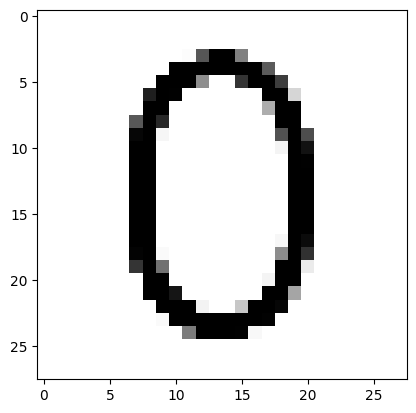

In [11]:
plt.imshow(images[200])

In [12]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy')>0.995):
            print("\nReached 99.5% accuracy so cancelling training!")
            self.model.stop_training = True

In [13]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(32, (3,3), input_shape=(28, 28, 1),  activation="relu"),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Conv2D(64, (3,3),  activation="relu"),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Conv2D(64, (3,3),  activation="relu"),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation="relu"),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])

c:\python\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 130,890 (511.29 KB)

 Trainable params: 130,890 (511.29 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1,
                             height_shift_range=0.1,
                             zoom_range=0.2,
                             shear_range=0.1,
                             rotation_range=10)

In [16]:
callbacks = myCallback()
history = model.fit(datagen.flow(train_images, train_labels),
                              epochs = 30, validation_data = (val_images, val_labels), callbacks = [callbacks])

Epoch 1/30
  1/204 ━━━━━━━━━━━━━━━━━━━━ 9:11 3s/step - accuracy: 0.1562 - loss: 2.3340

c:\python\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


204/204 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.1686 - loss: 2.2242 - val_accuracy: 0.8924 - val_loss: 0.5065
Epoch 2/30
204/204 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.6701 - loss: 0.9519 - val_accuracy: 0.9736 - val_loss: 0.1139
Epoch 3/30
204/204 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.8442 - loss: 0.4934 - val_accuracy: 0.9785 - val_loss: 0.0746
Epoch 4/30
204/204 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.8776 - loss: 0.3778 - val_accuracy: 0.9815 - val_loss: 0.0671
Epoch 5/30
204/204 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.9050 - loss: 0.2917 - val_accuracy: 0.9803 - val_loss: 0.0575
Epoch 6/30
204/204 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.9157 - loss: 0.2786 - val_accuracy: 0.9852 - val_loss: 0.0487
Epoch 7/30
204/204 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.9323 - loss: 0.2243 - val_accuracy: 0.9834 - val_loss: 0.0475
Epoch 8/30
204/204 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.9364 - loss: 0.2054 - val_accuracy: 0.986

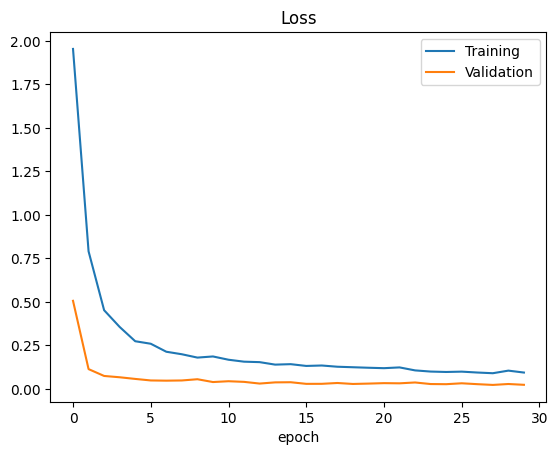

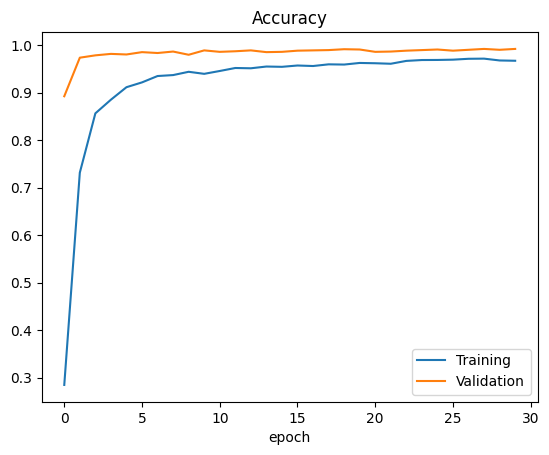

In [17]:
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training','Validation'])
plt.title('Loss')
plt.xlabel('epoch')
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training','Validation'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.show()

In [18]:
score = model.evaluate(test_images, test_labels, verbose=1)
print('Test Score : ', score[0])
print('Test Accuracy : ', score[1])

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9936 - loss: 0.0214
Test Score :  0.022599944844841957
Test Accuracy :  0.9926180839538574


In [19]:
#Digit Recognizer Model
new_model = model

In [20]:
#To order predicted digit nested list 
def display_predList(predList):
    predicted_digits = []
    for i in range(len(predList)):
        for j in range(len(predList)):
            predicted_digits.append(predList[j][i])
    
    return predicted_digits

In [21]:
import cv2
import numpy as np
import operator
from imutils import contours
import imutils
from ipynb.fs.full.sudokosolver import solveSudoku
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [22]:
#Parameters for Warping the image
margin = 10
case = 28 + 2*margin
perspective_size = 9*case

cap = cv2.VideoCapture(0)

flag = 0
ans = 0

while True:
    ret, frame=cap.read()
    p_frame = frame.copy()
    
    #Process the frame to find contour
    gray=cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    gray=cv2.GaussianBlur(gray, (5, 5), 0)
    thresh=cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 9, 2)
    
    #Get all the contours in the frame
    contours_, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contour = None
    maxArea = 0
    
    #Find the largest contour(Sudoku Grid)
    for c in contours_:
        area = cv2.contourArea(c)
        
        if area > 25000:
            peri = cv2.arcLength(c, True)
            polygon = cv2.approxPolyDP(c, 0.01*peri, True)
            
            if area>maxArea and len(polygon)==4:
                contour = polygon
                maxArea = area
    
    #Draw the contour and extract Sudoku Grid
    if contour is not None:
        cv2.drawContours(frame, [contour], 0, (0, 255, 0), 2)
        points = np.vstack(contour).squeeze()
        points = sorted(points, key=operator.itemgetter(1))
        
        if points[0][0]<points[1][0]:
            if points[3][0]<points[2][0]:
                pts1 = np.float32([points[0], points[1], points[3], points[2]])
            else:
                pts1 = np.float32([points[0], points[1], points[2], points[3]])
        else:
            if points[3][0]<points[2][0]:
                pts1 = np.float32([points[1], points[0], points[3], points[2]])
            else:
                pts1 = np.float32([points[1], points[0], points[2], points[3]])
                
        pts2 = np.float32([[0, 0], [perspective_size, 0], [0, perspective_size], [perspective_size, perspective_size]])
        matrix = cv2.getPerspectiveTransform(pts1, pts2)
        perspective_window =cv2.warpPerspective(p_frame, matrix, (perspective_size, perspective_size))
        result = perspective_window.copy()
        
        #Process the extracted Sudoku Grid
        p_window = cv2.cvtColor(perspective_window, cv2.COLOR_BGR2GRAY)
        p_window = cv2.GaussianBlur(p_window, (5, 5), 0)
        p_window = cv2.adaptiveThreshold(p_window, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 9, 2)
        vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
        p_window = cv2.morphologyEx(p_window, cv2.MORPH_CLOSE, vertical_kernel)
        lines = cv2.HoughLinesP(p_window, 1, np.pi/180, 120, minLineLength=40, maxLineGap=10)
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(perspective_window, (x1, y1), (x2, y2), (0, 255, 0), 2)
        
        #Invert the grid for digit recognition
        invert = 255 - p_window
        invert_window = invert.copy()
        
        invert_window = invert_window /255
        i = 0
        
        #Check if the answer has been already predicted or not
        #If not predict the answer
        #Else only get the cell regions
        if flag != 1:
            predicted_digits = []
            pixels_sum = []
        
        #To get individual cells
        for y in range(9):
            predicted_line = []
            for x in range(9):
                y2min = y*case+margin
                y2max = (y+1)*case-margin
                x2min = x*case+margin
                x2max = (x+1)*case-margin
                
                #Obtained Cell
                image = invert_window[y2min:y2max, x2min:x2max]
                
                #Process the cell to feed it into model
                img = cv2.resize(image,(28,28))
                img = img.reshape((1,28,28,1))
                
                #Get sum of all the pixels in the cell
                #If sum value is large it means the cell is blank
                pixel_sum = np.sum(img)
                pixels_sum.append(pixel_sum)
                
                #Predict the digit in the cell
                pred = new_model.predict(img)
                predicted_digit = pred.argmax()
                
                #For blank cells set predicted digit to 0
                if pixel_sum > 775.0:
                    predicted_digit = 0
                # print(predicted_digit)
                predicted_line.append(predicted_digit)                        
                
                #If we already have predicted result, display it on window
                if flag == 1:
                    ans = 1
                    x_pos = int((x2min + x2max)/ 2)+10
                    y_pos = int((y2min + y2max)/ 2)-5
                    image = cv2.putText(result, str(pred_digits[i]), (y_pos, x_pos), cv2.FONT_HERSHEY_SIMPLEX,  
                    1, (255, 0, 0), 2, cv2.LINE_AA)
                    
                i = i + 1
            print(predicted_line)
            #Get predicted digit list
            if flag != 1:
                predicted_digits.append(predicted_line)
                        
        #Get solved Sudoku
        ans = True
        if ans==True:
            flag = 1
            pred_digits = display_predList(predicted_digits)
            
            #Display the final result
            if ans == 1:
                cv2.imshow("Result", result)
                frame = cv2.warpPerspective(result, matrix, (perspective_size, perspective_size), flags=cv2.WARP_INVERSE_MAP)
        
        cv2.imshow("frame", frame)
        cv2.imshow('P-Window', p_window)
        cv2.imshow('Invert', invert)
            


    cv2.imshow("frame", frame)
    
    
    key=cv2.waitKey(1)&0xFF
    if key==ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━

KeyboardInterrupt: 

: 